# IMDB Review Sentiment Classification with RNNs

In [26]:
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
import matplotlib.pyplot as plt

In [3]:
# prep IMDB data
max_features = 10000
maxlen = 500

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Basic RNN

In [6]:
# Define and Train simple RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

D:\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.5775 - acc: 0.6865 - val_loss: 0.5044 - val_acc: 0.7482
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.3553 - acc: 0.8548 - val_loss: 0.3826 - val_acc: 0.8388
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2901 - acc: 0.8871 - val_loss: 0.3208 - val_acc: 0.8770
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2351 - acc: 0.9103 - val_loss: 0.4534 - val_acc: 0.7856
Epoch 5/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1839 - acc: 0.9327 - val_loss: 0.3536 - val_acc: 0.8614
Epoch 6/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1514 - acc: 0.9460 - val_loss: 0.4040 - val_acc: 0.8516
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1106 - acc: 0.9603 - val_loss: 0.4047 - val_acc:

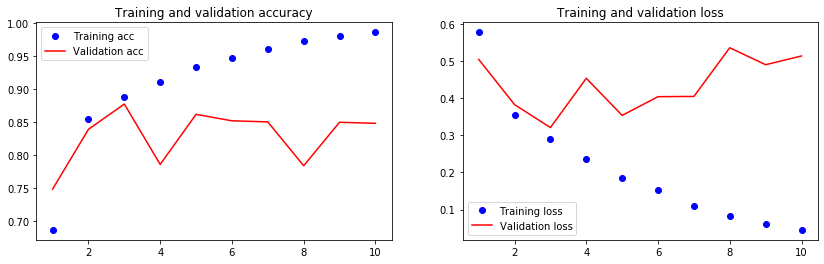

In [25]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

f, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'r', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

Since the inputs only consider the first 500 words of reviews, the network does not have access to much information. Additionally, RNNs are not very good at processing long sequences, resulting in an accuracy of ~87% on the validation split.

## LSTM
A more complex implementation of the basic RNN, is the Long Short-Term Memory. It allows the network to retain important information and forgetting other information by implementing carry units which carry info across time steps. This improves the network's ability to retain past information since it is less susceptible to the vanishing gradient problem.

In [28]:
# Define and train LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

D:\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.5140 - acc: 0.7581 - val_loss: 0.3807 - val_acc: 0.8460
Epoch 2/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.3031 - acc: 0.8818 - val_loss: 0.3287 - val_acc: 0.8636
Epoch 3/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.2413 - acc: 0.9091 - val_loss: 0.3032 - val_acc: 0.8858
Epoch 4/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.2015 - acc: 0.9279 - val_loss: 0.3018 - val_acc: 0.8698
Epoch 5/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1793 - acc: 0.9360 - val_loss: 0.2855 - val_acc: 0.8884
Epoch 6/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1552 - acc: 0.9451 - val_loss: 0.2997 - val_acc: 0.8902
Epoch 7/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.1445 - acc: 0.9498 - val_loss: 0.3666 - v

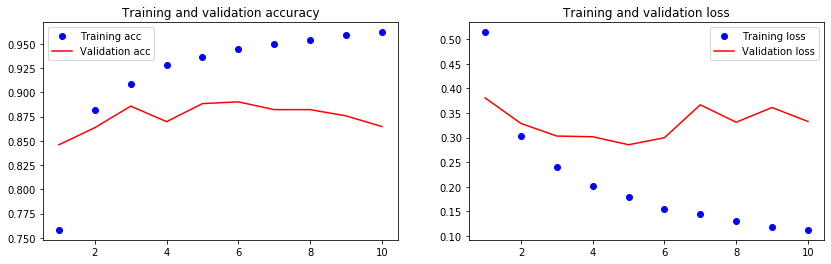

In [29]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

f, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'r', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

With the neural net implementing LSTM we are able to increase the accuracy to 89% on the validation set. The accuracy could be further improved by increasing the number of words to include per review, adding regularization, and tuning other hyperparameters such as embedding dimensionality.